# Decision Tree Classification
A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.<br>
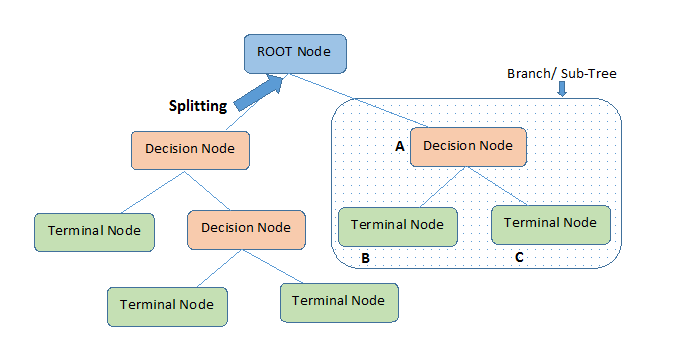

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn import preprocessing

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

data = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [4]:
feature_column = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

x = data[feature_column]
y = data.label

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [5]:
model = DecisionTreeClassifier()

model = model.fit(x_train, y_train)

y_pred = model.predict(x_test)

<AxesSubplot:>

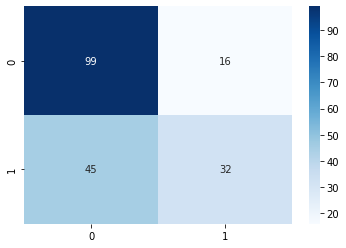

In [6]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

[Text(0.474609375, 0.9615384615384616, 'X[4] <= 129.5\ngini = 0.443\nsamples = 576\nvalue = [385, 191]'),
 Text(0.23587740384615385, 0.8846153846153846, 'X[3] <= 27.5\ngini = 0.308\nsamples = 378\nvalue = [306, 72]'),
 Text(0.061598557692307696, 0.8076923076923077, 'X[2] <= 30.45\ngini = 0.153\nsamples = 192\nvalue = [176, 16]'),
 Text(0.019230769230769232, 0.7307692307692307, 'X[6] <= 0.662\ngini = 0.018\nsamples = 110\nvalue = [109, 1]'),
 Text(0.009615384615384616, 0.6538461538461539, 'gini = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(0.028846153846153848, 0.6538461538461539, 'X[6] <= 0.697\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.019230769230769232, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.038461538461538464, 0.5769230769230769, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.10396634615384616, 0.7307692307692307, 'X[6] <= 1.272\ngini = 0.299\nsamples = 82\nvalue = [67, 15]'),
 Text(0.09435096153846154, 0.6538461538461539, 'X[5] 

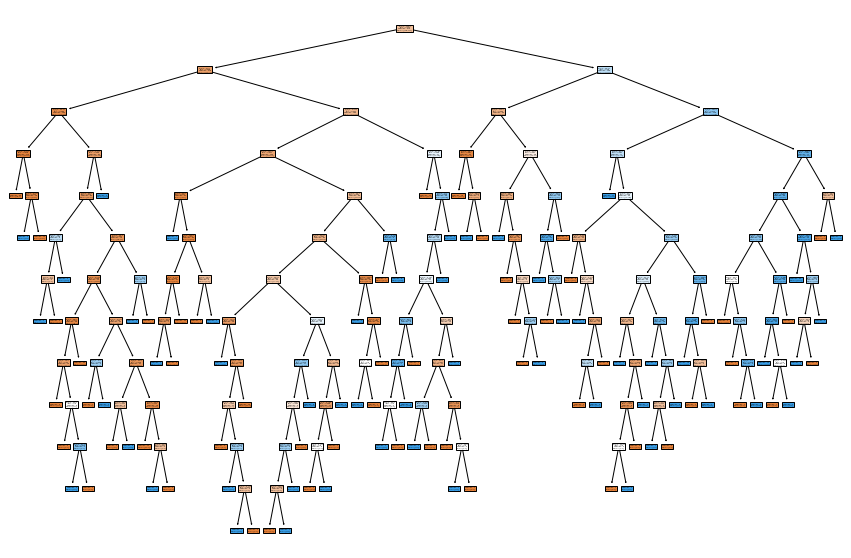

In [7]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

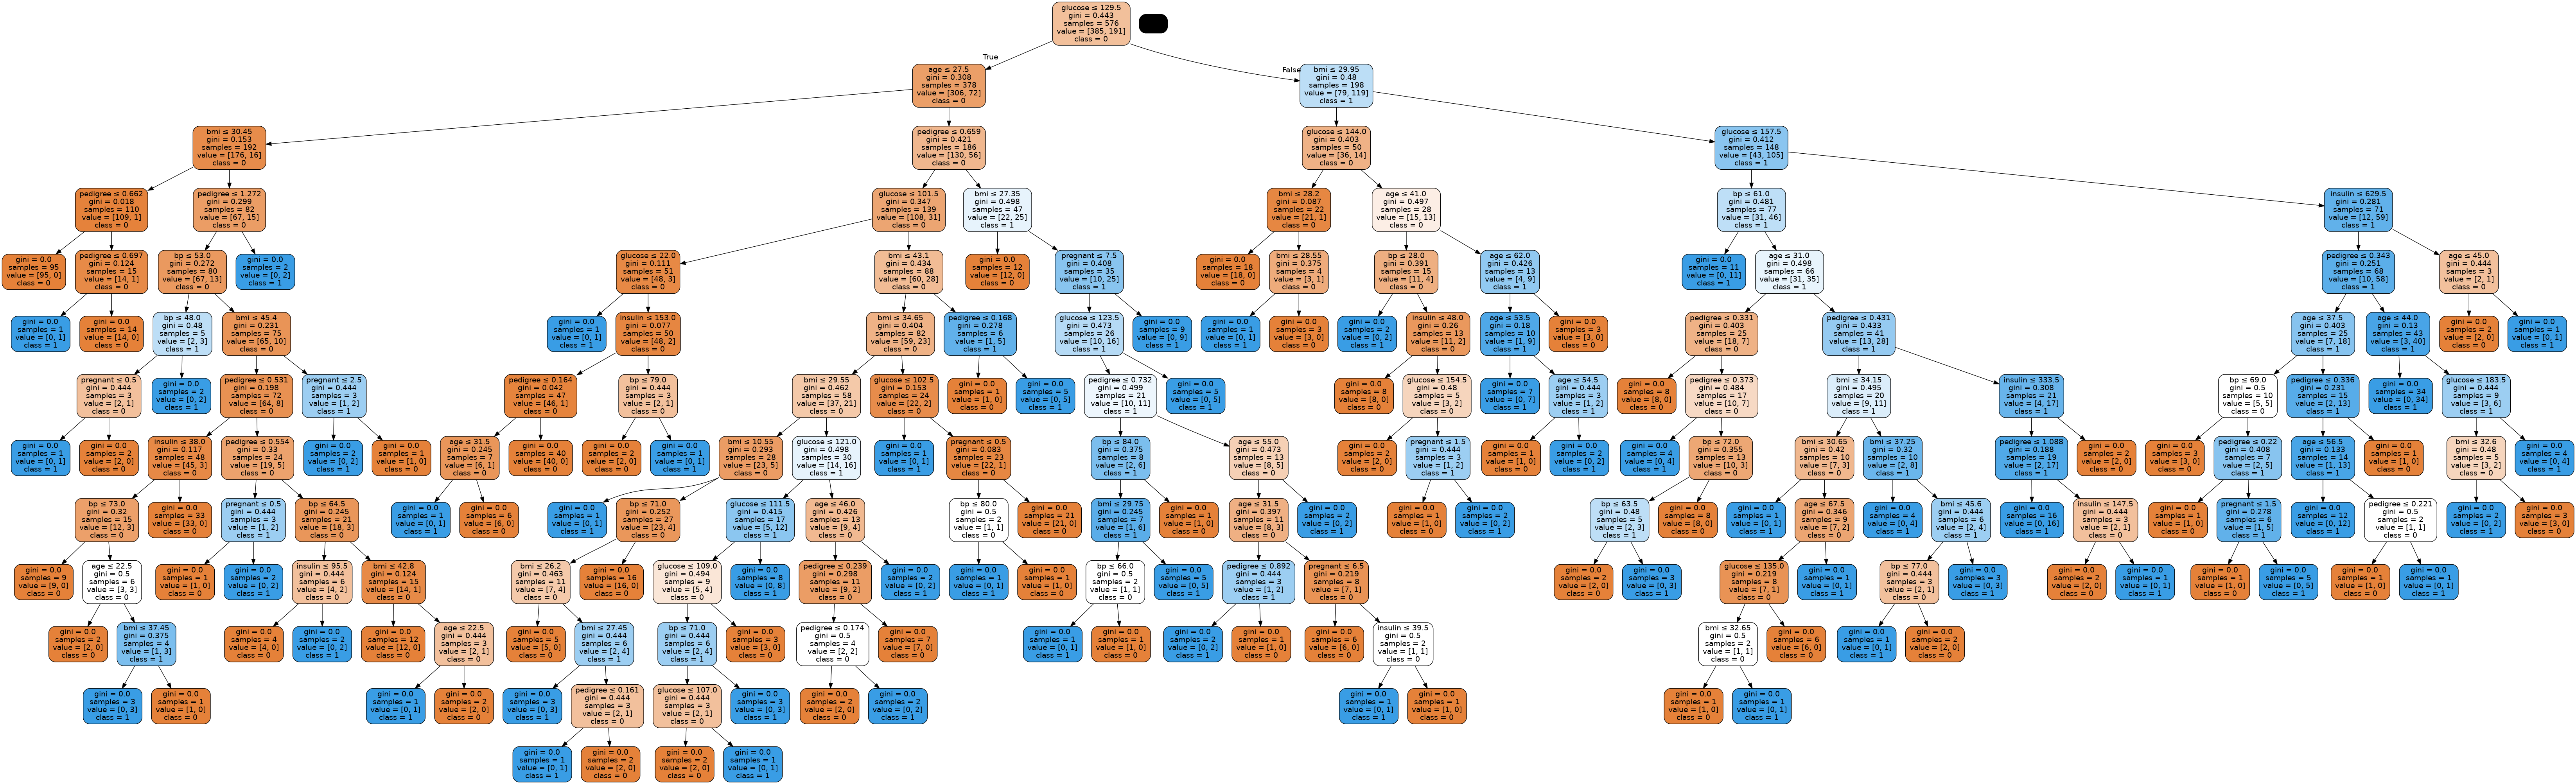

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_column,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())